Submission Proyek Akhir : Image Classificaiton Model Deployment

---


Modul : Belajar Pengembangan Machine Learning

---


Nama / ID Dicoding : Endricho Abednego / M239X0468


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from tensorflow.python import metrics
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import pathlib


In [2]:
! pip install kaggle
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download misrakahmed/vegetable-image-dataset 

100% 533M/534M [00:25<00:00, 52.6MB/s]
100% 534M/534M [00:25<00:00, 21.8MB/s]


In [4]:
! unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [5]:
base_dir = "Vegetable Images"
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

In [6]:
os.listdir('Vegetable Images/train')


['Cabbage',
 'Broccoli',
 'Cauliflower',
 'Potato',
 'Bottle_Gourd',
 'Pumpkin',
 'Tomato',
 'Radish',
 'Brinjal',
 'Cucumber',
 'Capsicum',
 'Bean',
 'Bitter_Gourd',
 'Papaya',
 'Carrot']

In [7]:
os.listdir('Vegetable Images/validation')


['Cabbage',
 'Broccoli',
 'Cauliflower',
 'Potato',
 'Bottle_Gourd',
 'Pumpkin',
 'Tomato',
 'Radish',
 'Brinjal',
 'Cucumber',
 'Capsicum',
 'Bean',
 'Bitter_Gourd',
 'Papaya',
 'Carrot']

In [8]:

train_datagen = ImageDataGenerator(
      rescale = 1.0/255,
      horizontal_flip = True,
      shear_range = 0.2,
      zoom_range = 0.2, 
      rotation_range = 20,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = True,
      fill_mode = 'nearest',
      validation_split = 0.2)

validation_datagen = ImageDataGenerator(
      rescale = 1.0/255,
      horizontal_flip = True,
      shear_range = 0.2,
      zoom_range = 0.2, 
      rotation_range = 20,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      vertical_flip = True,
      fill_mode = 'nearest',
      validation_split = 0.2
)

In [10]:
train_gen = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(200,200), 
    batch_size = 32,
    class_mode='categorical',
    subset = 'training'
)

valid_gen = validation_datagen.flow_from_directory(
    val_dir, 
    target_size=(200,200), 
    class_mode='categorical',
    
)

Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation= 'relu'),
    tf.keras.layers.Dense(15,activation= 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi sudah diatas 92%, Bagus!")
      self.model.stop_training = True

callbacks = myCallback()

In [16]:
history = model.fit(train_gen, 
                    epochs = 55, 
                    steps_per_epoch = 50,
                    validation_data = valid_gen, 
                    validation_steps = 10,
                    verbose = 2,
                    callbacks = [callbacks])

Epoch 1/55
50/50 - 20s - loss: 0.2522 - accuracy: 0.9181 - val_loss: 0.2933 - val_accuracy: 0.9031 - 20s/epoch - 399ms/step
Epoch 2/55
50/50 - 18s - loss: 0.2498 - accuracy: 0.9181 - val_loss: 0.2491 - val_accuracy: 0.9094 - 18s/epoch - 368ms/step
Epoch 3/55
50/50 - 18s - loss: 0.3114 - accuracy: 0.8963 - val_loss: 0.2317 - val_accuracy: 0.9344 - 18s/epoch - 352ms/step
Epoch 4/55
50/50 - 19s - loss: 0.2680 - accuracy: 0.9100 - val_loss: 0.3294 - val_accuracy: 0.8906 - 19s/epoch - 382ms/step
Epoch 5/55
50/50 - 18s - loss: 0.2528 - accuracy: 0.9169 - val_loss: 0.2867 - val_accuracy: 0.9125 - 18s/epoch - 353ms/step
Epoch 6/55

Akurasi sudah diatas 92%, Bagus!
50/50 - 18s - loss: 0.2210 - accuracy: 0.9325 - val_loss: 0.2321 - val_accuracy: 0.9219 - 18s/epoch - 354ms/step


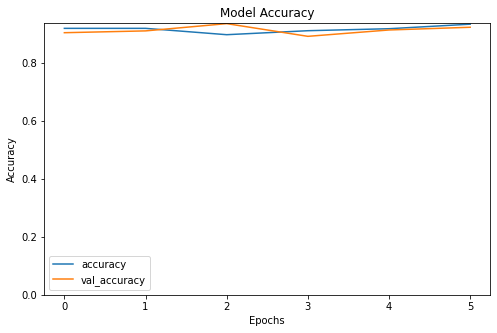

In [17]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0)
plt.show()

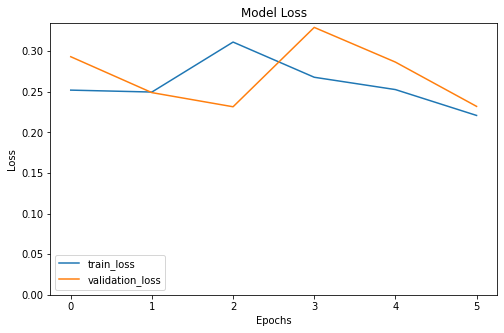

In [18]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()

In [19]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegetable.tflite')
tflite_model_file.write_bytes(tflite_model)

54019496